In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
with open('tom_1.txt', 'r', encoding='UTF-8') as f:
    text1_ru = f.read().lower()
text1_ru = re.sub('[^а-я]','', text1_ru)

In [3]:
with open('tom_2.txt', 'r', encoding='UTF-8') as f:
    text2_ru = f.read().lower()
text2_ru = re.sub('[^а-я]','', text2_ru)

In [4]:
with open('tom_3.txt', 'r', encoding='UTF-8') as f:
    text3_ru = f.read().lower()
text3_ru = re.sub('[^а-я]','', text3_ru)

In [5]:
with open('tom_4.txt', 'r', encoding='UTF-8') as f:
    text4_ru = f.read().lower()
text4_ru = re.sub('[^а-я]','', text4_ru)

In [6]:
text_ru = text1_ru + text2_ru + text3_ru + text4_ru

In [7]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

In [8]:
probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [9]:
for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1

In [10]:
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

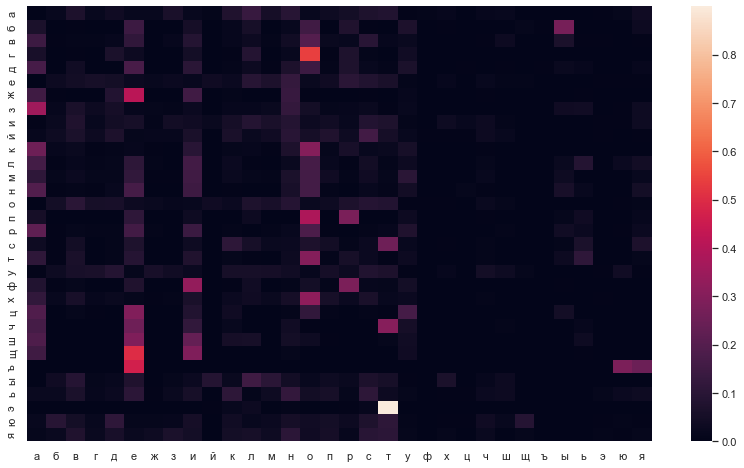

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df_ru)
plt.show()

Посчитаем вероятность встретить слово из четырёх символов, которое начинается на букву «П» и заканчивается на букву «Р».

In [12]:
start = POS_RU['п']
end = POS_RU['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities_ru[start, POS_RU[c]] * probabilities_ru[POS_RU[c], POS_RU[d]] * probabilities_ru[POS_RU[d], end]
        if proba > 0:
            print(''.join(['п', c, d, 'р']), proba)

паар 2.5995388227900577e-07
пабр 2.2790682068014613e-06
павр 2.306313096837757e-06
пагр 2.100507798345619e-06
падр 4.432164840939361e-06
паер 3.377530375866005e-06
пажр 1.59737552856315e-08
пазр 1.6929849915253648e-06
паир 5.755102751274013e-07
пайр 5.047226450451695e-07
пакр 6.9097458010584755e-06
палр 1.0456816034100697e-06
памр 6.661620900365866e-07
панр 4.324340722514072e-07
паор 2.0095371191452895e-06
папр 1.5704521751700086e-05
парр 8.693313306714934e-08
паср 1.069453812335402e-06
патр 7.035385460502165e-06
паур 3.4357216663903593e-07
пафр 4.0394349240961415e-06
пахр 6.287084785186794e-07
пацр 4.430717640631088e-09
пачр 6.699506456064655e-08
пашр 1.7731896724231543e-08
пащр 7.428450486250164e-09
паэр 3.875518784229171e-08
паюр 5.125750082729475e-07
паяр 8.856637811129695e-07
пбар 3.2212201101105585e-09
пббр 7.069038710111095e-11
пбвр 1.3262784745640847e-10
пбгр 5.6855898786281406e-11
пбдр 1.2606218651872166e-10
пбер 1.457160438352223e-08
пбжр 3.011351645846826e-13
пбзр 4.34036816

Используя матрицу переходных вероятностей, сгенерируем слово, начинающееся с буквы «Б» длиной восемь символов.

In [13]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS_RU[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities_ru[index])
    s.append(next_char)

print (''.join(s))

бядоучте


In [14]:
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from scipy.stats import boxcox
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
ser =  pd.read_csv("international-airline-passengers.csv")['Count']

In [16]:
# Зададим функцию для проведения теста Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [17]:
# Зададим функцию вывода коррелограмм
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


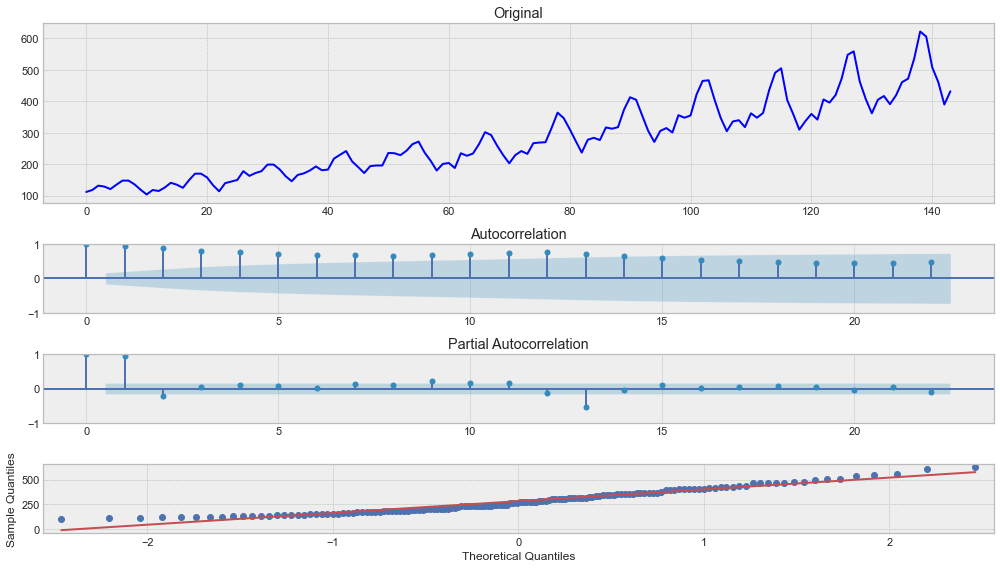

In [18]:
# Для проверки ряда на стационарность сделаем тест Дики-Фуллера и посмотрим на коррелограммы
tsplot(ser)

In [19]:
# Применим дифференцирование с лагом 12 месяцев
ser = np.diff(ser, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.634342e+01
p-value                        2.980504e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64


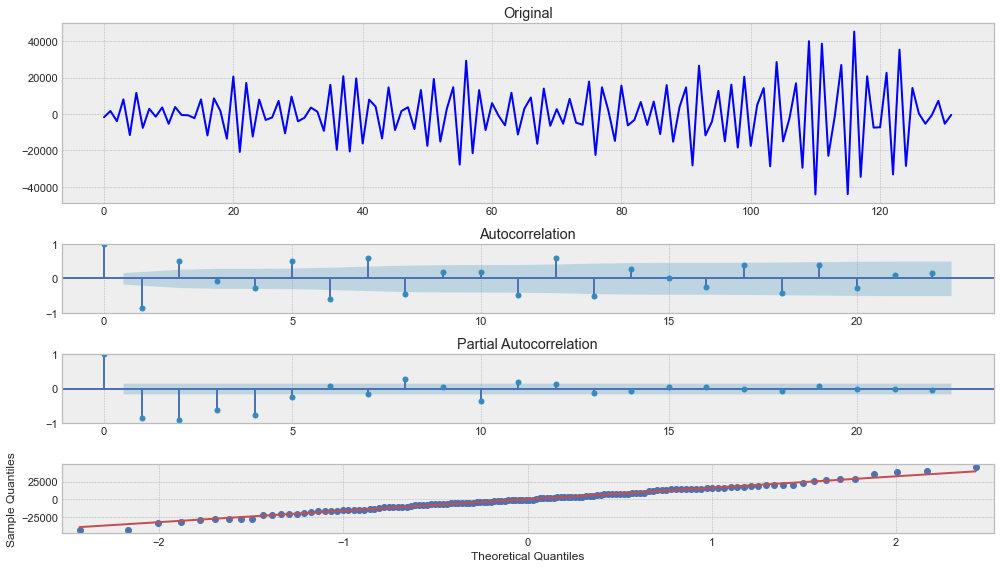

In [20]:
tsplot(ser)

In [21]:
from hmmlearn.hmm import GaussianHMM

In [22]:
values = ser.reshape(-1,1)

In [23]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1467.9604782420367
2 -1446.5969860774776
3 -1438.7270050320753
4 -1416.4654237688276
5 -1404.4540079889096
6 -1390.2388075208526
7 -1383.6899149873561
8 -1374.190755285695


Fitting a model with 142 free scalar parameters with only 132 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 132 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 132 data points will result in a degenerate solution.


9 -1371.74934798518
10 -1368.581918339142
11 -1341.7501136252154
12 -1347.864599143271
13 -1338.3998649985688


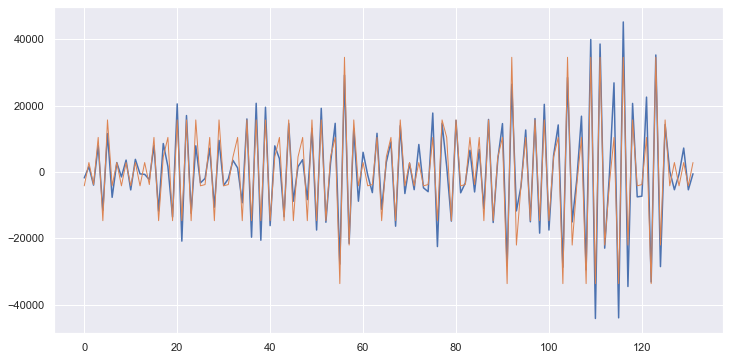

In [24]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=1)

In [25]:
model.transmat_.shape

(10, 10)

Попробуем построить через среднее каждой компоненты наивный прогноз ряда.

In [26]:
# Создаем пустой список для хранения прогнозов
predictions = []

# Для каждого наблюдения в данных
for t in range(len(values)-1):
    # Получаем текущее состояние
    current_state = labels[t]
    # Вычисляем следующее состояние на основе матрицы переходов
    next_state = np.argmax(model.transmat_[current_state])
    # Добавляем среднее значение следующего состояния в прогнозы
    predictions.append(model.means_[next_state])

In [27]:
# Добавляем последний прогноз, т.к. выше мы итерировали до len(values)-1
last_state = labels[-1]
predictions.append(model.means_[last_state])

In [28]:
# Преобразуем список прогнозов в массив numpy для дальнейшего использования
predictions = np.array(predictions)

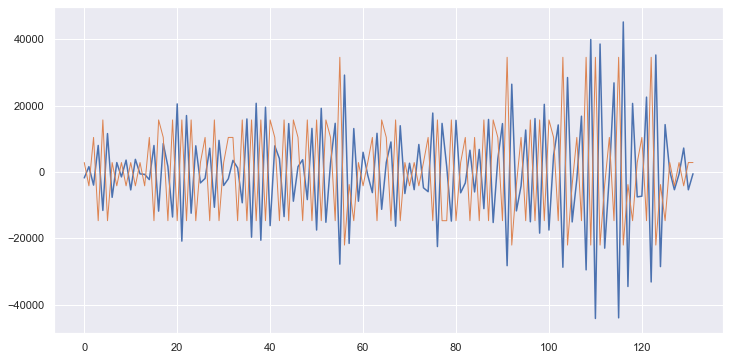

In [29]:
# Строим график исходных данных и прогнозов
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(predictions, linewidth=1)

1. С помощью скрытых марковских моделей (HMM) было проанализировано поведение временного ряда. Оптимальное количество состояний для модели HMM было выбрано равным 10 на основе максимизации значения функции правдоподобия.
2. После обучения модели HMM были предсказаны скрытые состояния и извлечены соответствующие средние значения. На графике эти средние значения накладываются на исходные данные, что может обеспечивать некоторую степень сглаживания.
3. Матрица переходов для модели HMM имеет размерность 10x10, что соответствует десяти определенным скрытым состояниям. Эта матрица может быть интерпретирована как вероятности перехода между различными состояниями.

В целом, использование HMM может быть полезным подходом для моделирования и анализа временных рядов, особенно для задач прогнозирования или обнаружения аномалий.